Here's the lecture content:
1. Basic Mathematical Overview of the Logistic Function
2. Extra Math Resources
3. DataSet Analysis
4. Data Visualization
5. Data Preparation
6. Multicollinearity Consideration
7. Logistic Regression with SciKit Learn
8. Testing and Training Data Sets
9. Conclusion and More Resources

In [1]:
# Data imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math import
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating ML results
from sklearn import metrics

# Dataset import
import statsmodels.api as sm

In [2]:
# Logistic function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# set t from -6 to 6 (500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

#Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

 left off here- completed Lecture 76 part 1 Logistic Regression

In [15]:
# lets move on to the dataset, which is from 1978.
# loading the dataset into a pandas DataFrame
df_aff = sm.datasets.fair.load_pandas().data


In [16]:
# take a look at the DataFrame
df_aff.head()

rate_marriage  age  yrs_married  children  religious  educ  occupation  \
0              3   32          9.0         3          3    17           2   
1              3   27         13.0         3          1    14           3   
2              4   22          2.5         0          1    16           3   
3              4   37         16.5         4          3    16           5   
4              5   27          9.0         1          1    14           3   

   occupation_husb   affairs  
0                5  0.111111  
1                4  3.230769  
2                5  1.400000  
3                5  0.727273  
4                4  4.666666

In [17]:
# start classification
# create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0


In [18]:
# apply function onto DataFrame, affairs column
df_aff['Had_Affair'] = df_aff['affairs'].apply(affair_check)

In [20]:
# check DataFrame
df_aff

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0                 3  32.0          9.0       3.0          3    17           2   
1                 3  27.0         13.0       3.0          1    14           3   
2                 4  22.0          2.5       0.0          1    16           3   
3                 4  37.0         16.5       4.0          3    16           5   
4                 5  27.0          9.0       1.0          1    14           3   
5                 4  27.0          9.0       0.0          2    14           3   
6                 5  37.0         23.0       5.5          2    12           5   
7                 5  37.0         23.0       5.5          2    12           2   
8                 3  22.0          2.5       0.0          2    12           3   
9                 3  27.0          6.0       0.0          1    16           3   
10                2  27.0          6.0       2.0          1    16           3   
11                5  27.0          6.0       2.0          3    14           3   
12                3  37.0         16.5       5.5          1    12           2   
13                5  27.0          6.0       0.0          2    14           3   
14                4  22.0          6.0       1.0          1    14           4   
15                4  37.0          9.0       2.0          2    14           3   
16                4  27.0          6.0       1.0          1    12           3   
17                1  37.0         23.0       5.5          4    14           5   
18                2  42.0         23.0       2.0          2    20           4   
19                4  37.0          6.0       0.0          2    16           5   
20                5  22.0          2.5       0.0          2    14           3   
21                3  37.0         16.5       5.5          2     9           3   
22                3  42.0         23.0       5.5          3    12           5   
23                2  27.0          9.0       2.0          4    20           3   
24                4  27.0          6.0       1.0          2    12           5   
25                5  27.0          2.5       0.0          3    16           4   
26                2  27.0          6.0       2.0          2    12           2   
27                5  37.0         13.0       1.0          3    12           3   
28                2  32.0         16.5       2.0          2    12           4   
29                3  27.0          6.0       1.0          1    14           3   
...             ...   ...          ...       ...        ...   ...         ...   
6336              5  42.0         23.0       4.0          3    14           5   
6337              5  27.0          6.0       0.0          4    14           4   
6338              5  42.0         23.0       2.0          3    12           2   
6339              4  32.0         13.0       3.0          3    16           4   
6340              5  27.0         13.0       3.0          3    16           4   
6341              5  27.0          9.0       1.0          2    14           4   
6342              4  22.0          2.5       0.0          2    16           4   
6343              5  17.5          2.5       0.0          4    12           3   
6344              4  32.0         16.5       2.0          2    12           3   
6345              5  27.0          9.0       1.0          3    12           3   
6346              4  22.0          2.5       0.0          4    14           4   
6347              5  22.0          2.5       1.0          2    12           3   
6348              5  27.0          0.5       0.0          4    20           4   
6349              5  37.0         16.5       3.0          3    14           5   
6350              5  32.0         13.0       2.0          4    14           3   
6351              4  22.0          0.5       0.0          2    16           3   
6352              5  42.0         23.0       2.0          4    12           3   
6353              5  22.0          2.

In [22]:
# now group by new column
# call aggregate function
df_aff.groupby('Had_Affair').mean()

rate_marriage        age  yrs_married  children  religious  \
Had_Affair                                                               
0                4.329701  28.390679     7.989335  1.238813   2.504521   
1                3.647345  30.537019    11.152460  1.728933   2.261568   

                 educ  occupation  occupation_husb   affairs  
Had_Affair                                                    
0           14.322977    3.405286         3.833758  0.000000  
1           13.972236    3.463712         3.884559  2.187243

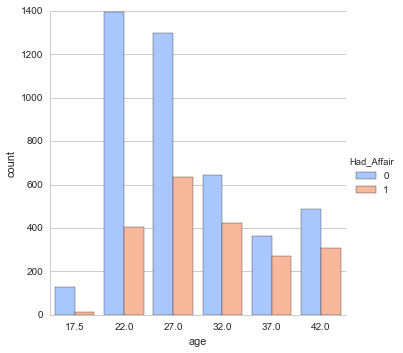

In [23]:
# now visualize the data
sns.factorplot('age',data=df_aff,hue='Had_Affair',palette='coolwarm')

In [24]:
# now do a second factorplot
sns.factorplot('yrs_married',data=df_aff,hue='Had_Affair',palette='coolwarm')

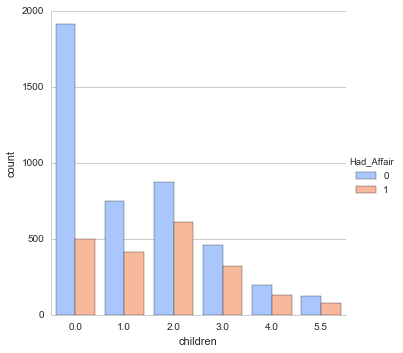

In [25]:
# more factorplots
sns.factorplot('children',data=df_aff,hue='Had_Affair',palette='coolwarm')

In [26]:
sns.factorplot('educ',data=df_aff,hue='Had_Affair',palette='coolwarm')

Progress through lecture 77, Part two